In [1]:
import boto3
import io
import numpy as np
import pandas as pd
import sagemaker
import seaborn

from sagemaker import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
s3_client = boto3.client('s3')
s3_bucket = "wheeler-cloud-guru-challenge-1020"
s3_object = "athena-results/imdb.csv"

imdb_data = s3_client.get_object(Bucket=s3_bucket, Key=s3_object)
imdb_body = imdb_data["Body"].read()
imdb_df = pd.read_csv(io.BytesIO(imdb_body), header=0, delimiter=",", low_memory=False)
imdb_df

,id,title,year,genres,rating,votes,isaction,isadventure,iscomedy,iscrime,isdocumentary,isdrama,ishorror,ismystery,isromance,isthriller
0,tt2073661,Dawn Patrol,2014,"[Drama, Thriller]",4.7,652,False,False,False,False,False,True,False,False,False,True
1,tt2402085,Jimi: All Is by My Side,2013,"[Biography, Drama, Music]",5.7,6274,False,False,False,False,False,True,False,False,False,False
2,tt2527338,Star Wars: Episode IX - The Rise of Skywalker,2019,"[Action, Adventure, Fantasy]",6.6,354287,True,True,False,False,False,False,False,False,False,False
3,tt2554714,Haunting of the Innocent,2014,"[Horror, Thriller]",2.3,393,False,False,False,False,False,False,True,False,False,True
4,tt8737614,Majiji,2019,"[Drama, Romance]",7.2,2779,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,tt1307002,Redemption,2009,"[Action, Crime, Drama]",3.5,510,True,False,False,True,False,True,False,False,False,False
800,tt2564156,In God We Trust,2013,[Documentary],7.6,26,False,False,False,False,True,False,False,False,False,False
801,tt2837574,The Old Man & the Gun,2018,"[Biography, Comedy, Crime]",6.7,39386,False,False,True,True,False,False,False,False,False,False
802,tt3422314,The First Line,2014,[Drama],5.0,244,False,False,False,False,False,True,False,False,False,False


In [3]:
year_df = imdb_df.groupby('year')['id'].nunique()
year_df 

year
1915      1
1917      1
1919      1
1927      1
1930      1
       ... 
2016     39
2017     48
2018     72
2019    144
2020     36
Name: id, Length: 76, dtype: int64

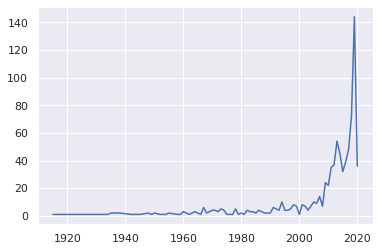

In [4]:
seaborn.set(style='darkgrid')
seaborn.lineplot(data=year_df)

In [5]:
imdb_df['rating'] = imdb_df['rating'].apply(lambda x: int(round(x)))
rating_df = imdb_df.groupby('rating')['id'].nunique()
rating_df

rating
2     11
3     32
4     84
5    121
6    238
7    195
8    107
9     16
Name: id, dtype: int64

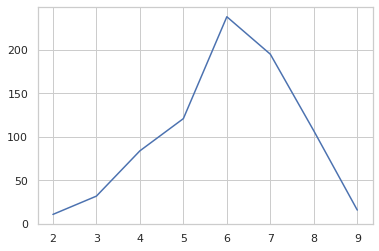

In [6]:
seaborn.set(style='whitegrid')
seaborn.lineplot(data=rating_df)

In [8]:
imdb_df['idx'] = range(1, len(imdb_df) + 1)
result_df = imdb_df[['id', 'idx', 'genres', 'rating', 'title', 'votes', 'year']]
result_df

,id,idx,genres,rating,title,votes,year
0,tt2073661,1,"[Drama, Thriller]",5,Dawn Patrol,652,2014
1,tt2402085,2,"[Biography, Drama, Music]",6,Jimi: All Is by My Side,6274,2013
2,tt2527338,3,"[Action, Adventure, Fantasy]",7,Star Wars: Episode IX - The Rise of Skywalker,354287,2019
3,tt2554714,4,"[Horror, Thriller]",2,Haunting of the Innocent,393,2014
4,tt8737614,5,"[Drama, Romance]",7,Majiji,2779,2019
...,...,...,...,...,...,...,...
799,tt1307002,800,"[Action, Crime, Drama]",4,Redemption,510,2009
800,tt2564156,801,[Documentary],8,In God We Trust,26,2013
801,tt2837574,802,"[Biography, Comedy, Crime]",7,The Old Man & the Gun,39386,2018
802,tt3422314,803,[Drama],5,The First Line,244,2014


In [9]:
del imdb_df['id']
del imdb_df['genres']
del imdb_df['title']

imdb_df = imdb_df.astype('float32')
imdb_df

In [11]:
scaler = MinMaxScaler()
scaler_columns = ['year', 'votes']
imdb_df[scaler_columns] = pd.DataFrame(scaler.fit_transform(imdb_df[scaler_columns]))
imdb_df

,year,rating,votes,isaction,isadventure,iscomedy,iscrime,isdocumentary,isdrama,ishorror,ismystery,isromance,isthriller,idx
0,0.942858,5.0,0.000282,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,0.933332,6.0,0.002729,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
2,0.990477,7.0,0.154249,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.942858,2.0,0.000169,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0
4,0.990477,7.0,0.001208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,0.895237,4.0,0.000220,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,800.0
800,0.933332,8.0,0.000009,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,801.0
801,0.980951,7.0,0.017146,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0
802,0.942858,5.0,0.000104,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,803.0


In [12]:
sage_session = sagemaker.Session()
sage_outputs = f"s3://{sage_session.default_bucket()}/imdb/"

kmeans = KMeans(role=sagemaker.get_execution_role(),
                instance_count=1,
                instance_type='ml.c4.xlarge',
                output_path=sage_outputs,              
                k=9)

In [13]:
%%time
train_data = imdb_df.values
kmeans.fit(kmeans.record_set(train_data))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2020-11-28 23:08:32 Starting - Starting the training job...
2020-11-28 23:08:34 Starting - Launching requested ML instances.........
2020-11-28 23:10:07 Starting - Preparing the instances for training......
2020-11-28 23:11:16 Downloading - Downloading input data...
2020-11-28 23:12:02 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
[11/28/2020 23:12:05 INFO 140224026076992] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'_enable_profiler': u'false', u'_tuning_objective_metric': u'', u'_num_gpus': u'auto', u'local_lloyd_num_trials': u'auto', u'_log_level': u'info', u'_kvstore': u'auto', u'local_lloyd_init_method': u'kmeans++', u'force_dense': u'true', u'epochs': u'1', u'init_method': u'random', u'local_lloyd_tol': u'0.0001', u'local_lloyd_max_iter': u'300', u'_disable_wait_to_read': u'false', u'extra_

In [14]:
%%time
model = kmeans.deploy(initial_instance_count=1,instance_type='ml.m4.xlarge')

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-----------------!CPU times: user 391 ms, sys: 18.1 ms, total: 409 ms
Wall time: 8min 32s


In [17]:
predictions = model.predict(train_data)
print(f"predictions[0]:\n{predictions[0]}")

predictions[0]:
label {
  key: "closest_cluster"
  value {
    float32_tensor {
      values: 5.0
    }
  }
}
label {
  key: "distance_to_cluster"
  value {
    float32_tensor {
      values: 43.34727478027344
    }
  }
}



In [18]:
sagemaker.Session().delete_endpoint(model.endpoint_name)

In [19]:
result_df['cluster'] = np.nan
result_df['distance'] = np.nan

for i, p in enumerate(predictions):
    result_df.at[i, 'cluster'] = p.label['closest_cluster'].float32_tensor.values[0]
    result_df.at[i, 'distance'] = p.label['distance_to_cluster'].float32_tensor.values[0]
    
result_df

,id,idx,genres,rating,title,votes,year,cluster,distance
0,tt2073661,1,"[Drama, Thriller]",5,Dawn Patrol,652,2014,5.0,43.347275
1,tt2402085,2,"[Biography, Drama, Music]",6,Jimi: All Is by My Side,6274,2013,5.0,42.330372
2,tt2527338,3,"[Action, Adventure, Fantasy]",7,Star Wars: Episode IX - The Rise of Skywalker,354287,2019,5.0,41.358356
3,tt2554714,4,"[Horror, Thriller]",2,Haunting of the Innocent,393,2014,5.0,40.536339
4,tt8737614,5,"[Drama, Romance]",7,Majiji,2779,2019,5.0,39.354885
...,...,...,...,...,...,...,...,...,...
799,tt1307002,800,"[Action, Crime, Drama]",4,Redemption,510,2009,0.0,44.163757
800,tt2564156,801,[Documentary],8,In God We Trust,26,2013,0.0,45.145599
801,tt2837574,802,"[Biography, Comedy, Crime]",7,The Old Man & the Gun,39386,2018,0.0,46.121445
802,tt3422314,803,[Drama],5,The First Line,244,2014,0.0,47.112896


In [20]:
result_df.to_csv('imdb_predictions.csv', encoding='utf-8', index=False)

In [21]:
! aws s3 cp "imdb_predictions.csv" "s3://wheeler-cloud-guru-challenge-1020/sagemaker-results/"

upload: ./imdb_predictions.csv to s3://wheeler-cloud-guru-challenge-1020/sagemaker-results/imdb_predictions.csv
